In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('dress_rental_prices.csv',index_col=0)
df.head()

,ID,Name,Brand,Colour,Catagories,Price
0,74416,Runway stripe dress,Stella McCartney,beige,dresses,111
1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
3,73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37
4,73605,Ellen,RIXO,beige,dresses,47


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29997 entries, 0 to 29996
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          29997 non-null  int64 
 1   Name        29995 non-null  object
 2   Brand       29997 non-null  object
 3   Colour      29997 non-null  object
 4   Catagories  29883 non-null  object
 5   Price       29997 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.6+ MB


In [4]:
df.isna().sum()

ID              0
Name            2
Brand           0
Colour          0
Catagories    114
Price           0
dtype: int64

In [8]:
flat_categories = [cat for sublist in df['Catagories'] if isinstance(sublist, str) for cat in sublist.split(', ')]

unique_categories = sorted(set(flat_categories))
one_hot_df = pd.DataFrame(0, index=np.arange(len(df['Catagories'])), columns=unique_categories)
for i, cat_str in enumerate(df['Catagories']):
    if isinstance(cat_str, str):
        cat_list = cat_str.split(', ')
        one_hot_df.loc[i, cat_list] = 1

print(one_hot_df)

       3/4 Sleeves  3/4 sleeve  A-Line  Animal Print  Baby Blue  Bandage  \
0                0           0       0             0          0        0   
1                0           0       0             0          0        0   
2                0           0       0             0          0        0   
3                0           0       0             0          0        0   
4                0           0       0             0          0        0   
...            ...         ...     ...           ...        ...      ...   
29992            0           0       0             0          0        0   
29993            0           0       1             0          0        0   
29994            0           0       0             0          0        0   
29995            0           0       0             0          0        0   
29996            0           0       0             0          0        0   

       Beige  Bell Sleeve  Black  Bodycon  ...  v-neck  victorian  waist  \
0          

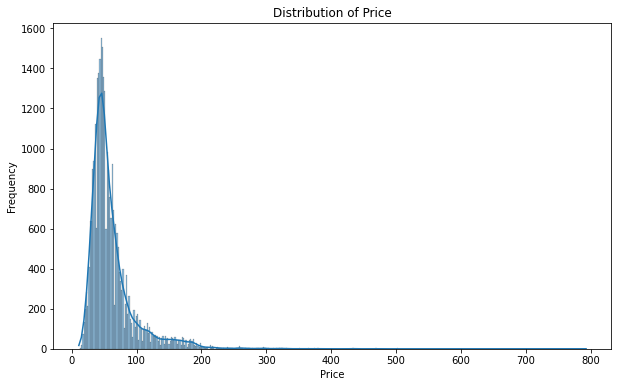

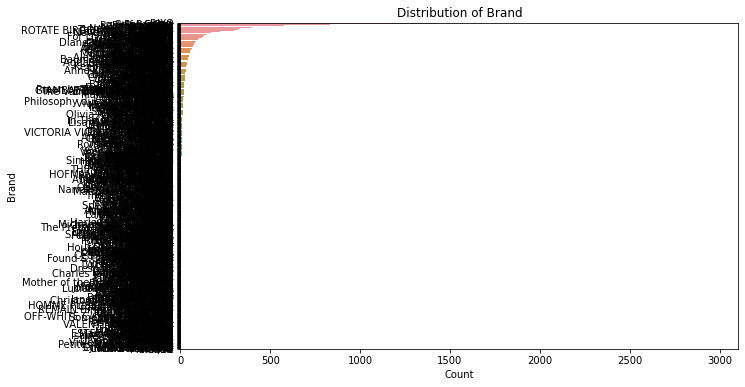

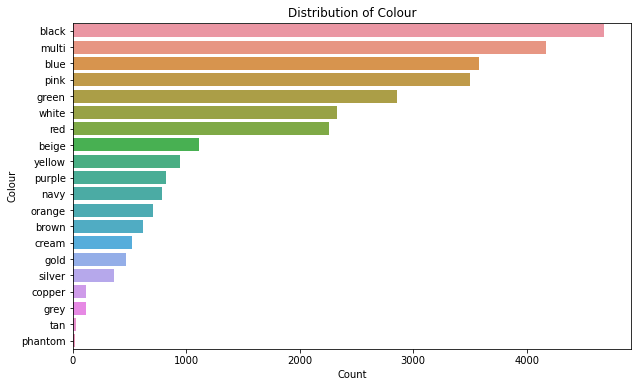

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'].dropna(), kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Distribution of the 'brand' column
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Brand'], order=df['Brand'].value_counts().index)
plt.title('Distribution of Brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

# Distribution of the 'colour' column
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Colour'], order=df['Colour'].value_counts().index)
plt.title('Distribution of Colour')
plt.xlabel('Count')
plt.ylabel('Colour')
plt.show()

In [14]:
df = pd.concat([df, one_hot_df], axis=1)
df.head()

,ID,Name,Brand,Colour,Catagories,Price,3/4 Sleeves,3/4 sleeve,A-Line,Animal Print,...,v-neck,victorian,waist,wash,wedding,wedding guest,y2k,yellow,zebra,zimmerman
0,74416,Runway stripe dress,Stella McCartney,beige,dresses,111,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,73605,Ellen,RIXO,beige,dresses,47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df = df.drop(columns='Catagories')

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Brand']=le.fit_transform(df['Brand'])
df['Colour']=le.fit_transform(df['Colour'])

In [17]:
df.head()

,ID,Name,Brand,Colour,Price,3/4 Sleeves,3/4 sleeve,A-Line,Animal Print,Baby Blue,...,v-neck,victorian,waist,wash,wedding,wedding guest,y2k,yellow,zebra,zimmerman
0,74416,Runway stripe dress,797,0,111,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,73815,Reformation Kourtney Dress,695,0,50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,73801,Ivory Viola bridal dress,294,0,75,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,73718,Pasu Dress - Rhino Tusk,180,0,37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,73605,Ellen,676,0,47,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df = df.drop(columns=['Name', 'ID'])
X = df.drop(columns='Price')
y = df['Price']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = Sequential()
model.add(Dense(64, input_shape=(594,), activation='relu')) 
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
750/750 [==============================] - 3s 3ms/step - loss: 1762.1440 - val_loss: 1622.9015
Epoch 2/50
750/750 [==============================] - 2s 3ms/step - loss: 1472.1506 - val_loss: 1524.1075
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 1430.0294 - val_loss: 1536.4115
Epoch 4/50
750/750 [==============================] - 2s 3ms/step - loss: 1409.5287 - val_loss: 1496.2075
Epoch 5/50
750/750 [==============================] - 2s 3ms/step - loss: 1393.0465 - val_loss: 1485.5698
Epoch 6/50
750/750 [==============================] - 2s 3ms/step - loss: 1388.9669 - val_loss: 1517.3260
Epoch 7/50
750/750 [==============================] - 2s 3ms/step - loss: 1386.9716 - val_loss: 1574.5652
Epoch 8/50
750/750 [==============================] - 2s 3ms/step - loss: 1385.6656 - val_loss: 1533.8203
Epoch 9/50
750/750 [==============================] - 2s 3ms/step - loss: 1385.7729 - val_loss: 1497.6975
Epoch 10/50
750/750 [=========================

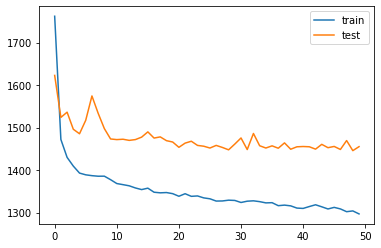

In [24]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [25]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1101.721439452848
